### 1. Trying out sentiment analysis models

In [1]:
from transformers import TFRobertaForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import logging
from transformers import logging as transformers_logging
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


transformers_logging.set_verbosity_error()
logging.getLogger("transformers").setLevel(logging.ERROR)

labels = {
    0 : 'negative',
    1 : 'neutral',
    2 : 'positive'
}
def test_sentiment_score(text, tokenizer, model):
    encoded_input = tokenizer(text, return_tensors='tf')
    output = model(encoded_input)
    scores = output[0][0].numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    ranked_labels = [labels[i] for i in ranking]
    return (ranked_labels[0])

In [2]:
import re
 
text = "I hate children"
model_roberta_older = "cardiffnlp/twitter-roberta-base-sentiment"



tokenizer_older = AutoTokenizer.from_pretrained(model_roberta_older)
model_older = TFRobertaForSequenceClassification.from_pretrained(model_roberta_older)


c:\My programs\Python 3.12\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### 2. Setting up dataframe for accuracy calculation

In [3]:
import pandas as pd

df_test = pd.read_csv('twitter_validation.csv', header=None)
df_test.rename(columns={2:"sentiment", 3:"tweet"}, inplace=True)
df_test.dropna()

,0,1,sentiment,tweet
0,tweet_id,entity,sentiment,tweet
1,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
2,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
3,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
4,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
...,...,...,...,...
996,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
997,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
998,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
999,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:

df_test = df_test.drop(df_test[df_test['sentiment'] == 'Irrelevant'].index).dropna()
df_test = df_test.head(10_000) #Only doing this on the first 1000 tweets, to save time
df_test

,0,1,sentiment,tweet
0,tweet_id,entity,sentiment,tweet
2,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
3,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
4,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
5,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
994,314,Amazon,Negative,Please explain how this is possible! How can t...
995,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
998,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
999,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
pd.set_option('display.max_colwidth', None)  
df_test['roberta_old'] = df_test['tweet'].apply(lambda x: test_sentiment_score(x, tokenizer_older, model_older))
df_test

,0,1,sentiment,tweet,roberta_old
0,tweet_id,entity,sentiment,tweet,neutral
2,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…,neutral
3,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄,negative
4,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking, it's a truly awful game.",negative
5,4433,Google,Neutral,Now the President is slapping Americans in the face that he really did commit an unlawful act after his acquittal! From Discover on Google vanityfair.com/news/2020/02/t…,negative
...,...,...,...,...,...
994,314,Amazon,Negative,Please explain how this is possible! How can they let companies overcharge for this? It’s a scam! @amazon shame on you! pic.twitter.com/MQB7BUPthx,negative
995,9701,PlayStation5(PS5),Positive,"Good on Sony. As much as I want to see the new PS5, what's going on right now is so much more important.",positive
998,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play borderlands until the sun comes up so I can hate myself all day tomorrow.,negative
999,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,positive


In [6]:
df_test.loc[df_test['sentiment'] == 'Neutral', 'sentiment'] = 'neutral'
df_test.loc[df_test['sentiment'] == 'Positive', 'sentiment'] = 'positive'
df_test.loc[df_test['sentiment'] == 'Negative', 'sentiment'] = 'negative'

In [7]:
df_test.head()

,0,1,sentiment,tweet,roberta_old
0,tweet_id,entity,sentiment,tweet,neutral
2,352,Amazon,neutral,BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…,neutral
3,8312,Microsoft,negative,@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄,negative
4,4371,CS-GO,negative,"CSGO matchmaking is so full of closet hacking, it's a truly awful game.",negative
5,4433,Google,neutral,Now the President is slapping Americans in the face that he really did commit an unlawful act after his acquittal! From Discover on Google vanityfair.com/news/2020/02/t…,negative


### 3. Checking the accuracy by comparing model labels with human labels

In [8]:
matches = df_test['sentiment'] == df_test['roberta_old']
percentage_matches = matches.mean() * 100
print(f"Accuracy of our model: {percentage_matches:.2f}%")

Accuracy of our model: 66.22%


In [12]:
df_test[["tweet", "sentiment", "roberta_old"]].query("sentiment == 'positive' and roberta_old == 'negative'").head(20)

,tweet,sentiment,roberta_old
9,my ass still knee-deep in Assassins Creed Odyssey with no way out anytime soon lmao,positive,negative
12,Itching to assassinate \r\n\r\n#TCCGif #AssassinsCreedBlackFlag #AssassinsCreed #TheCapturedCollective pic.twitter.com/vv8MOGtCjw,positive,negative
55,"@BeverlyCitizen Ronald Bellanti is a resident of Beverly, MA and works for Ground Control, an organization he founded as a drunk driving prevention campaign. He took to Facebook to express deplorably racist and violent views. Please help expose him! pic.twitter.com/78RitUkeM2",positive,negative
103,LETS FUCKING GOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,positive,negative
149,"Completed #Fustercluck this weekend, rounding off year one of #Borderlands3. I decided to go back in response and play the original Borderlands again as I had the 4K GOTY version on my PC already. The shooting feels awful. I'm going to try some suggested ini changes tomorrow.",positive,negative
151,Doing anything in extreme will cause consequences...banning pubg is not the solution! #UnBanPubg,positive,negative
224,"My games crew had a League of legends clash yesterday, and this is how all of my texting apps looked like.\r\nI love these assholes xD pic.twitter.com/NT3CfSlteN",positive,negative
244,The newest assassins creed looks so FREAKING SICK AND I CANNOT WAIT.,positive,negative
310,red dead redemption got me wanting to move to a mother fucking ranch,positive,negative
374,Fuck buying one for my man I’m gonna buy one for myself 👀,positive,negative


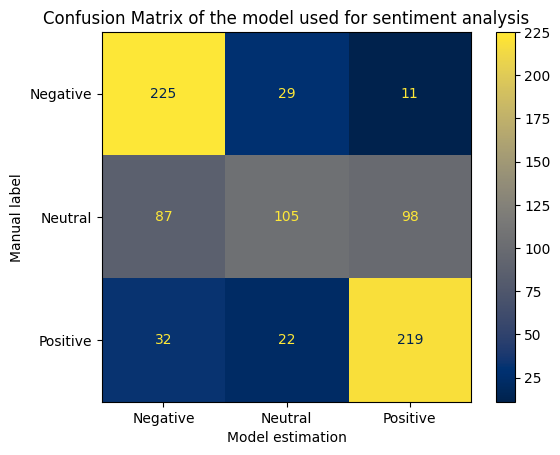

In [15]:

# Extract true sentiment and predicted sentiment
y_true = df_test['sentiment']
y_pred = df_test['roberta_old']

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['negative', 'neutral', 'positive'])

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])

# Plot the confusion matrix
disp.plot(cmap='cividis')
plt.ylabel('Manual label')
plt.xlabel('Model estimation')
plt.title('Confusion Matrix of the model used for sentiment analysis');